##**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1UMj5HnWO1EfbJ_ZyYkMbVeQJZtIiexI7"

In [ ]:
imported = drive.CreateFile({'id': id})
imported.GetContentFile('rank_predictor_dataset.csv')

In [ ]:
data = pd.read_csv('rank_predictor_dataset.csv')
data.head()

,JEE Main Percentile,JEE Main Rank,BCECE General Rank
0,82,215750,2143.0
1,80,215776,2145.0
2,74,312314,30000.0
3,71,309124,3727.0
4,79.51,239776,2408.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JEE Main Percentile  90 non-null     object 
 1   JEE Main Rank        90 non-null     object 
 2    BCECE General Rank  90 non-null     float64
dtypes: float64(1), object(2)
memory usage: 4.6+ KB


##**Data Preprocessing**

In [ ]:
data.isnull().sum()

JEE Main Percentile    100
JEE Main Rank          100
 BCECE General Rank    100
dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True)
data

,JEE Main Percentile,JEE Main Rank,BCECE General Rank
0,82,215750,2143.0
1,80,215776,2145.0
2,74,312314,30000.0
3,71,309124,3727.0
4,79.51,239776,2408.0
...,...,...,...
85,71.76,355883,3537.0
86,80.8987154,207442,2116.0
87,38,700000,6500.0
88,40,153264,7683.0


In [ ]:
data['JEE Main Percentile'] = data['JEE Main Percentile'].str.replace('[^\w\s\.]','')
data['JEE Main Rank'] = data['JEE Main Rank'].str.replace('[^\w\s]','')
data = data.drop(' BCECE General Rank',axis = 1)

In [ ]:
data = data.astype({'JEE Main Percentile' : float,'JEE Main Rank' : int})
data.dtypes

JEE Main Percentile    float64
JEE Main Rank            int64
dtype: object

In [ ]:
data = data.round(decimals=2)
print(data.isnull().sum())
data.head()

JEE Main Percentile    0
JEE Main Rank          0
dtype: int64


,JEE Main Percentile,JEE Main Rank
0,82.00,215750
1,80.00,215776
2,74.00,312314
3,71.00,309124
4,79.51,239776


##**Data Processing and Model Building**

In [ ]:
data_new = np.array(data)

dataset = pd.DataFrame(data_new,columns = ['X','y'])

X = dataset.iloc[:,:-1].values
X = X.reshape(-1,1)

y = dataset.iloc[:,1].values
print(y)
print(X.shape,y.shape)

[215750. 215776. 312314. 309124. 239776. 315703. 174328. 183000. 217934.
  25000. 165934. 195628. 204865. 336425. 220000. 137000. 447117. 175000.
 198000.  15000. 359166. 105436. 134247.   1032. 300000. 110000. 190000.
 200057. 201035. 241042. 234408. 548363. 312049. 270000. 250000. 226478.
 432915. 230000. 270000. 192673. 300300. 747639. 274607. 237234. 204000.
 256049. 260840. 212323. 204689. 185335. 215004. 268000. 469080. 200000.
 195858. 225863. 215617. 176738. 194739. 250000. 220258. 122676. 429619.
  23314. 452866. 160000. 428074. 243899. 339241. 154000. 213002. 158563.
 199751. 169530. 154906. 179940. 179940. 238640. 258789. 185362. 150007.
 190056. 399063. 158628. 198646. 355883. 207442. 700000. 153264. 505903.]
(90, 1) (90,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
log_model = LinearRegression()
log_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##**Model Prediction and Evaluation**

In [ ]:
predlog = log_model.predict(X_test)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
Score= math.sqrt(mean_squared_error(y_test,predlog))
print("RMSE :", Score)

RMSE : 139595.38621848912


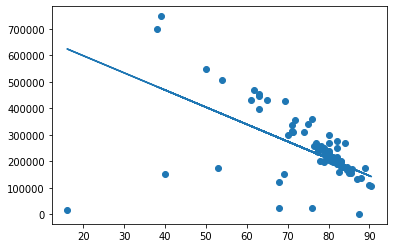

In [ ]:
line = log_model.coef_*X+log_model.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**From above plot, we tried to put the best fit line.**

##**Comparing Actual Data with Predicted Data**

In [ ]:
dfc = pd.DataFrame({'Actal Data' : y_test , 'Predicted Data' : predlog})
dfc.head(10)

,Actal Data,Predicted Data
0,194739.0,196962.896594
1,258789.0,222472.627247
2,237234.0,209911.998448
3,225863.0,215221.130208
4,700000.0,481843.137393
5,154906.0,177539.243812
6,220258.0,209911.998448
7,469080.0,328202.043889
8,260840.0,229659.378776
9,192673.0,196962.896594
